In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns


pd.set_option('display.max_columns', None)


df = pd.read_excel("ADHD.xlsx")

rem_cols = [
    "specify", "home_language", "nbt_completed", "nbt_year", "nbt_did_math",
    *[f"bdi1_item_{i}" for i in range(1, 22)],
    *[f"aas1_item_{i}" for i in range(1, 10)],
    *[f"audit1_item_{i}" for i in range(1, 10)],
    *[f"bai1_item_{i}" for i in range(1, 22)],
    *[f"asrs1_item_{i}" for i in range(1, 19)]
]

df = df.drop(columns=rem_cols).reset_index()

short_name_cols = {
    'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school': 'PreUniMHBeforeUni',
    'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses': 'ListedDiagnoses',
    'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one': 'UsedPsychMedication',
    'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started': 'MHStartAge',
    'have_you_ever_been_diagnosed_with_a_mental_illness': 'MentalIllnessDiagnosis',
    'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one': 'CurrentPsychMedicationUse',
    'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one': 'TherapyExperience',
    'was_this_diagnosis_made_before_or_after_you_left_high_school': 'DiagnosisTiming',
    'if_yes_please_list_these_difficulties_and_or_symptoms': 'ListedDifficulties',
    'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this': 'DiagnosisAge',
    'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one': 'CurrentTherapyStatus'
}

df = df.rename(columns=short_name_cols)

max_age = df["age"].max()

def process_age_column(column):
    extracted_age = column.str.extract(r'(\d+)', expand=False)  
    processed_age = extracted_age.apply(lambda x: np.nan if pd.isnull(x) or int(x) > max_age else int(x))
    return processed_age

df['DiagnosisAge'] = process_age_column(df['DiagnosisAge'])
df['MHStartAge'] = process_age_column(df['MHStartAge'])



df

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
keys = {
    "Depression": ["depression", "depressed"],
    "ADHD": ["adhd"],
    "Autism":["autism"], "bipolar": ["bipolar"],
    "Anxiety": ["anxiety", "anxious", "stress"],
    "Suicide":["suicide", "suicidal"],
    "OCD": ["overthink", "ocd"],
    "PanicAttack": ["panic"],
    }

def find_keys(sentence, key):
    return int(any(value in str(sentence).lower() for value in keys[key]))





for key in keys.keys():
    df[f'PreUni{key}'] = df["ListedDifficulties"].apply(find_keys, args=(key,))
    df[key] = df["ListedDiagnoses"].apply(find_keys, args=(key,))


upd_def = df.drop(columns=["ListedDifficulties", "ListedDiagnoses"])




upd_def

,index,age,sex,PreUniMHBeforeUni,MHStartAge,MentalIllnessDiagnosis,DiagnosisTiming,DiagnosisAge,UsedPsychMedication,CurrentPsychMedicationUse,TherapyExperience,CurrentTherapyStatus,bdi1_total,audit1_total,aas1_total,psy1004_grade,nbt_al,nbt_math,nbt_ql,nbt_ave,nbt_alql_ave,matric_mark,asrs1_total.x,bai1_total,asrs1_total.y,aas_change,PreUniDepression,Depression,PreUniADHD,ADHD,PreUniAutism,Autism,PreUnibipolar,bipolar,PreUniAnxiety,Anxiety,PreUniSuicide,Suicide,PreUniOCD,OCD,PreUniPanicAttack,PanicAttack
0,0,22,female,no,NaN,no,not applicable,NaN,not applicable,not applicable,not applicable,not applicable,24,0,32,65,57,67,44,56,50.50,84,19,44,44.00,-0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,21,male,no,NaN,no,not applicable,NaN,not applicable,not applicable,not applicable,not applicable,5,4,35,67,82,0,64,73,73.00,66,31,6,6.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,19,female,yes,15.00,not formally diagnosed,before,14.00,yes,no,no,no,20,14,30,56,58,0,41,50,49.50,69,52,28,29.00,NaN,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,3,20,male,yes,16.00,"yes, formally diagnosed by a doctor or mental ...",after,18.00,yes,yes,yes,yes,10,14,24,76,87,0,89,88,88.00,80,41,23,23.00,-2.24,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,4,20,female,no,NaN,no,not applicable,NaN,no,no,no,no,7,0,30,59,55,92,56,68,55.50,77,27,12,12.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,18,female,yes,16.00,no,not applicable,NaN,no,no,no,no,12,0,25,55,65,38,45,49,55.00,75,34,16,16.00,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
502,502,18,female,no,NaN,no,not applicable,NaN,not applicable,not applicable,not applicable,not applicable,5,4,33,64,70,41,56,56,63.00,71,39,6,6.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
503,503,18,female,no,NaN,no,not applicable,NaN,no,no,no,no,6,0,28,67,61,31,55,49,58.00,72,31,5,5.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
504,504,18,female,yes,14.00,no,not applicable,NaN,no,not applicable,yes,no,6,2,31,66,73,0,52,62,62.50,75,27,13,14.00,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
diagnosis_replacements = {
    "yes, formally diagnosed by a doctor or mental health professional": "yes formally",
    "not formally diagnosed": "not formally"
}

upd_def["MentalIllnessDiagnosis"] = upd_def["MentalIllnessDiagnosis"].replace(diagnosis_replacements)

features = ["UsedPsychMedication", "CurrentPsychMedicationUse", "TherapyExperience", "sex","CurrentTherapyStatus", "PreUniMHBeforeUni", "MentalIllnessDiagnosis"]

ohe = OneHotEncoder(sparse_output=False)

upd_defs = []
for feature in features:
    transformed_data = ohe.fit_transform(upd_def[[feature]])
    transformed_df = pd.DataFrame(transformed_data, columns=ohe.get_feature_names_out([feature]))
    upd_defs.append(transformed_df)

upd_def = pd.concat([upd_def.drop(columns=features), *upd_defs], axis=1)

label_encoder = LabelEncoder() 

upd_def["DiagnosisTiming"] = label_encoder.fit_transform(upd_def["DiagnosisTiming"])

columns_to_drop = ["UsedPsychMedication_not applicable","CurrentPsychMedicationUse_not applicable", "DiagnosisAge", "TherapyExperience_not applicable","CurrentTherapyStatus_not applicable","MHStartAge", "aas_change"]
upd_def.drop(columns=columns_to_drop, inplace=True)

upd_def


index                                  0
age                                    0
DiagnosisTiming                        0
bdi1_total                             0
audit1_total                           0
aas1_total                             0
psy1004_grade                          0
nbt_al                                 0
nbt_math                               0
nbt_ql                                 0
nbt_ave                                0
nbt_alql_ave                           0
matric_mark                            0
asrs1_total.x                          0
bai1_total                             0
asrs1_total.y                          1
PreUniDepression                       0
Depression                             0
PreUniADHD                             0
ADHD                                   0
PreUniAutism                           0
Autism                                 0
PreUnibipolar                          0
bipolar                                0
PreUniAnxiety   

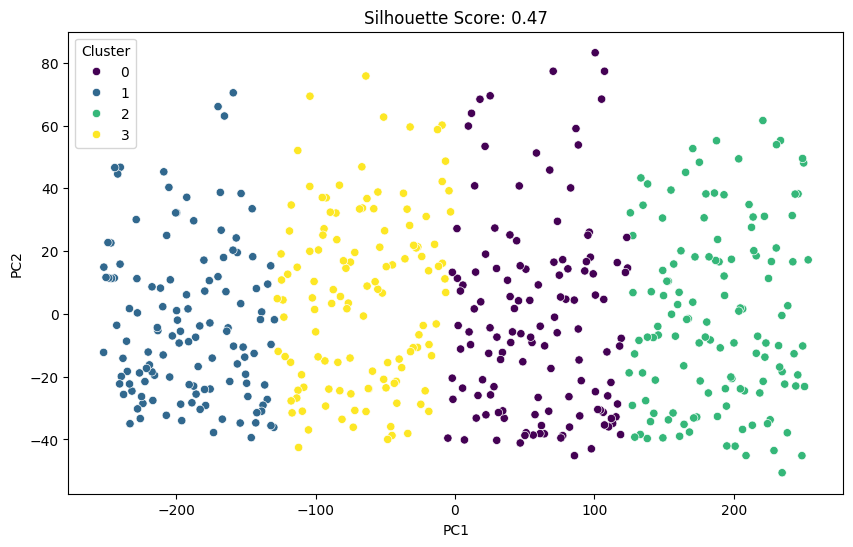

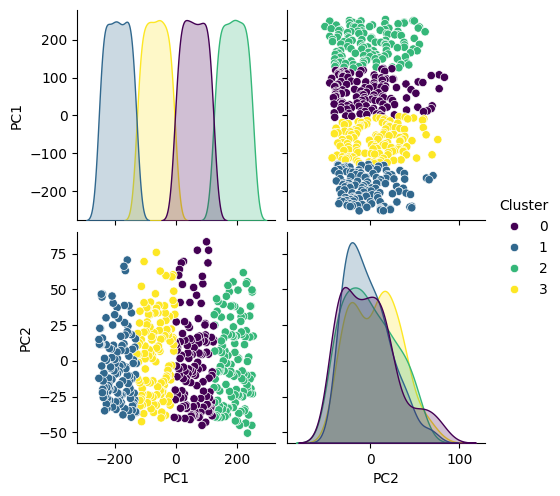

In [ ]:

corr_matrix = upd_def.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

upd_def = upd_def.drop(columns=to_drop)

train_upd_def, test_df = train_test_split(upd_def, test_size=0.3, random_state=1)

pca = PCA(n_components=2)
upd_def_pca = pca.fit_transform(upd_def)

kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(upd_def_pca)

upd_def_pca = pd.DataFrame(upd_def_pca, columns=['PC1', 'PC2'])
upd_def_pca['Cluster'] = clusters

score = silhouette_score(upd_def_pca[['PC1', 'PC2']], upd_def_pca['Cluster'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=upd_def_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title(f'Silhouette Score: {score:.2f}')
plt.show()

sns.pairplot(upd_def_pca, hue='Cluster', palette='viridis')
plt.show()



In [ ]:
from lazypredict.Supervised import LazyClassifier

X = upd_def.drop(["PreUniADHD", "ADHD"], axis=1)
y = upd_def['ADHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

clf = LinearSVC(dual='auto')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Weighted F1 score:", f1_score(y_test, y_pred, average="weighted"))


Weighted F1 score: 0.9111765427554901


In [ ]:
from sklearn.model_selection import cross_val_score

clf = LinearSVC(dual="auto")

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')

print("Mean F1 score (Cross Validation):", scores.mean())


Mean F1 score (Cross Validation): 0.9435622757640637
